Questão 01 - Lista 3

In [54]:
import sympy as sp
import numpy as np
from sympy import *
from utils import symdisp, symplot

In [55]:
#valor dos três ultimos digitos da matricula somado mais 1
m = [8,1,4]
x = m[0]+1
y = m[1]+1
z = m[2]+1


In [56]:
#Valores das indutâncias L1, L2 e L3
L1 = 4*(10**-3)
L2 = 1*(10**-3)
L3 = 5*(10**-3)
symdisp('L_1 = ', L1*(10**3), 'mH')
symdisp('L_2 = ', L2*(10**3), 'mH')
symdisp('L_3 = ', L3*(10**3), 'mH')


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [57]:
#variaável simbólica
t = sp.symbols('t', real=True)
v1 = -0.05*x*exp(-x*t)
v2 = -0.02*y*exp(-y*t)*cos(20*t)
v3 = 0.01*z*exp(-z*t)
symdisp('v_1 = ', v1, 'V')
symdisp('v_2 = ', v2, 'V')
symdisp('v_3 = ', v3, 'V')


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [58]:
#A partir do método da superposição, foi-se obtido as expressões para as tenssões em cada indutor
# Tensão no indutor = Contribuição de v1 + Contribuição de v2 + Contribuição de v3
vL1 = -v1+ 0 - v3
vL2 = 0 + v2 - v3
vL3 = -v1 - v2 + 0
symdisp('v_{L1} = ', vL1, 'V')
symdisp('v_{L2} = ', vL2, 'V')
symdisp('v_{L3} = ', vL3, 'V')


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

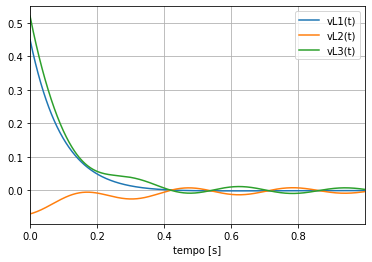

In [59]:
#plotagem das tensões
intervalo = np.arange(0,1,0.001)
symplot(t,[vL1,vL2,vL3],intervalo,['vL1(t)','vL2(t)','vL3(t)'])

In [60]:
#Determinando as correntes em cada indutor
int_vL1 = sp.integrate(vL1,(t,0,t))
int_vL2 = sp.integrate(vL2,(t,0,t))
int_vL3 = sp.integrate(vL3,(t,0,t))


Letra A

In [61]:
print('Letra A: Correntes nos indutores L1, L2 e L3')
iL1 = (L1**-1)*int_vL1; symdisp('i_{L1} (t) = ', iL1.simplify(), 'A')
iL2 = (L2**-1)*int_vL2; symdisp('i_{L2} (t)= ', iL2.simplify(), 'A')
iL3 = (L3**-1)*int_vL3; symdisp('i_{L3} (t)= ', iL3.simplify(), 'A')


Letra A: Correntes nos indutores L1, L2 e L3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

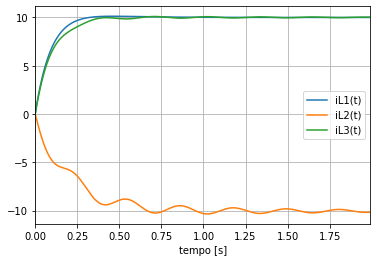

In [62]:
#plotagem da Correntes
intervalo = np.arange(0,2,0.01)
symplot(t,[iL1,iL2,iL3],intervalo,['iL1(t)','iL2(t)','iL3(t)'])


Letra B

In [63]:
print('Letra B: Potência nos indutores L1, L2 e L3')
pL1 = vL1*iL1
pL2 = vL2*iL2
pL3 = vL3*iL3
symdisp('p_{L1} (t) = ', pL1.simplify(), 'W')
symdisp('p_{L2} (t) = ', pL2.simplify(), 'W')
symdisp('p_{L3} (t) = ', pL3.simplify(), 'W') 


Letra B: Potência nos indutores L1, L2 e L3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

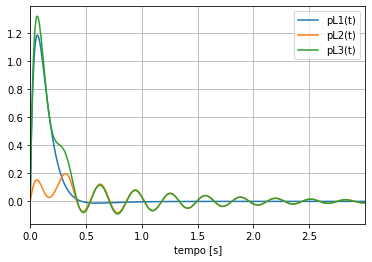

In [64]:
#plotagem da potencias
intervalo = np.arange(0,3 ,0.001)
symplot(t,[pL1,pL2,pL3],intervalo,['pL1(t)','pL2(t)','pL3(t)'])


Letra C

In [65]:
print('Letra C: Potência Máxima nos indutores L1, L2 e L3')
eqpL1 = sp.Eq(sp.diff(pL1,t),0)
eqpL2 = sp.Eq(sp.diff(pL2,t),0)
eqpL3 = sp.Eq(sp.diff(pL3,t),0)
# encontra numericamente o valor de t para o qual dp(t)/dt = 0
tL1max = sp.nsolve(eqpL1,t,(0,0.2), solver = 'bisect')
tL2max = sp.nsolve(eqpL2,t,(0.2,0.4), solver = 'bisect')
tL3max = sp.nsolve(eqpL3,t,(0,0.2), solver = 'bisect')
pL1max = pL1.evalf(subs={t:tL1max})
pL2max = pL2.evalf(subs={t:tL2max})
pL3max = pL3.evalf(subs={t:tL3max})

pmax =[pL1max,pL2max,pL3max]
print('Indutor que atinge o maior pico de potência:')

if (pL1max > pL2max) & (pL1max > pL3max):
    print('\n\tIndutor L1 atinge maior pico de potência.\n')
    print('Máximo valor de Potência:')
    symdisp('P_{LMax} = ', round(max(pmax),3), 'W')
    print('Instante em que a Potência é máxima:')
    symdisp('t_{LMax} = ', round(tL1max,3), 's')

elif (pL2max > pL1max) & (pL2max > pL3max):
    print('\n\tIndutor L2 atinge maior pico de potência.\n')
    print('Máximo valor de Potência:')
    symdisp('P_{LMax} = ', round(max(pmax),3), 'W')
    print('Instante em que a Potência é máxima:')
    symdisp('t_{LMax} = ', round(tL2max,3), 's')

elif (pL3max > pL1max) & (pL3max > pL2max):
    print('\n\tIndutor L3 atinge maior pico de potência.\n')
    print('Máximo valor de Potência:')
    symdisp('P_{LMax} = ', round(max(pmax),3), 'W')
    print('Instante em que a Potência é máxima:')
    symdisp('t_{LMax} = ', round(tL3max,3), 's')


Letra C: Potência Máxima nos indutores L1, L2 e L3
Indutor que atinge o maior pico de potência:

	Indutor L3 atinge maior pico de potência.

Máximo valor de Potência:


<IPython.core.display.Math object>

Instante em que a Potência é máxima:


<IPython.core.display.Math object>

Letra D

In [70]:
print('Letra D: Energia em cada Indutor')
#w = (1/2)*L*(i**2)
print('Energia acumulada no Indutor L1')
wL1 = sp.integrate(pL1,(t,0,oo))
symdisp('W_{L1} = ', round(wL1*(10**3),3), 'mJ')

print('Energia acumulada no Indutor L2')
wL2 = sp.integrate(pL2,(t,0,t))
#symdisp('W_{L2} = ', round(wL2*(10**3),3), 'mJ')

print('Energia acumulada no Indutor L3')
wL3 = sp.integrate(pL3,(t,0,100))
symdisp('W_{L3} = ', round(wL3*(10**3),3), 'mJ')


Letra D: Energia em cada Indutor
Energia acumulada no Indutor L1


<IPython.core.display.Math object>

Energia acumulada no Indutor L2
